In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## define LeNet-5 Model Architecture

In [18]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()
        self.conv1=nn.Conv2d(1,6,kernel_size=5,stride=1,padding=2)
        self.relu=nn.ReLU()
        self.pool=nn.AvgPool2d(kernel_size=2,stride=2)
        self.conv2=nn.Conv2d(6,16,kernel_size=5,stride=1)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    
    def forward(self,x):
        x=self.pool(self.relu(self.conv1(x)))
        x=self.pool(self.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.fc3(x)
        return x

## Hyperparameters

In [19]:
batch_size=64
epochs=5
lr=0.001

## Data Loading and Transformations

In [20]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
train_data=torchvision.datasets.MNIST(root='./data',train=True,transform=transform,download=True)
test_data=torchvision.datasets.MNIST(root='./data',train=False,transform=transform,download=True)
train_loader=DataLoader(train_data,batch_size,shuffle=True)
test_loader=DataLoader(test_data,batch_size,shuffle=True)

## Model,Loss,and Optimizer

In [21]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=LeNet5().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr)

## Model Training & evaluation

In [25]:
# training loop
train_losses,test_accuracies=[],[]
for epoch in range(epochs):
    model.train()
    running_loss=0.0
    for x,y in train_loader:
        x,y=x.to(device),y.to(device)
        optimizer.zero_grad()
        predictions=model(x)
        loss=criterion(predictions,y)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    avg_loss=running_loss/len(train_loader)
    train_losses.append(avg_loss)
    print(f'epoch {epoch+1}/{epochs}, Loss:{avg_loss:.4f}')

    #evaluation
    model.eval()
    correct,total=0,0
    with torch.no_grad():
        for x,y in test_loader:
            x,y=x.to(device),y.to(device)
            outputs=model(x)
            _,predicted=torch.max(outputs,1)
            total+=y.size(0)
            correct+=(predicted==y).sum().item()
    accuracy=100*correct/total
    test_accuracies.append(accuracy)
    print(f'Accuracy on test set:{accuracy:.2f}')

    
    

epoch 1/5, Loss:0.0300
Accuracy on test set:98.96
epoch 2/5, Loss:0.0259
Accuracy on test set:98.95
epoch 3/5, Loss:0.0231
Accuracy on test set:98.81
epoch 4/5, Loss:0.0205
Accuracy on test set:98.85
epoch 5/5, Loss:0.0178
Accuracy on test set:98.99


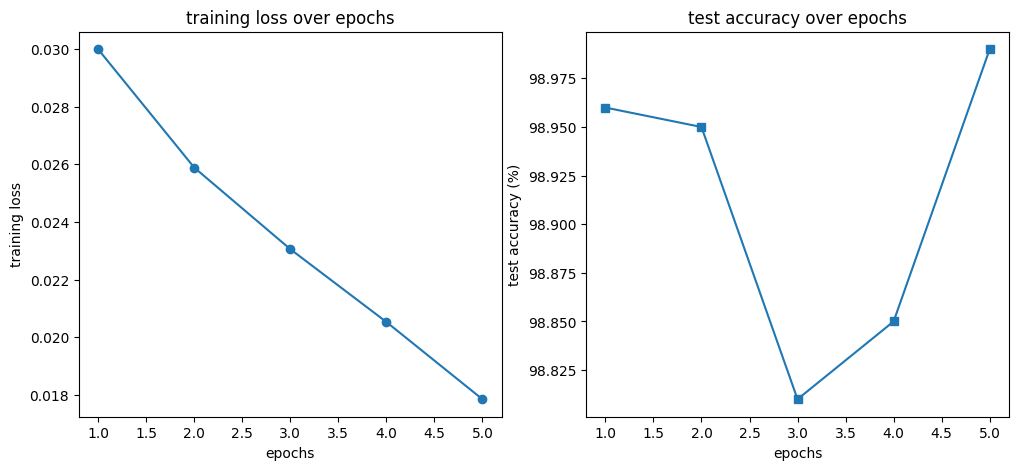

In [27]:
# plot accuracy and loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1),train_losses,marker='o',linestyle='-')
plt.xlabel('epochs')
plt.ylabel('training loss')
plt.title('training loss over epochs')

plt.subplot(1,2,2)
plt.plot(range(1,epochs+1),test_accuracies,marker='s',linestyle='-')
plt.xlabel('epochs')
plt.ylabel('test accuracy (%)')
plt.title('test accuracy over epochs')
plt.show()

In [30]:
def predict_image(image):
    model.eval()
    with torch.no_grad():
        image=image.to(device)
        output=model(image)
        _,pred=torch.max(output,1)
    return pred.item()


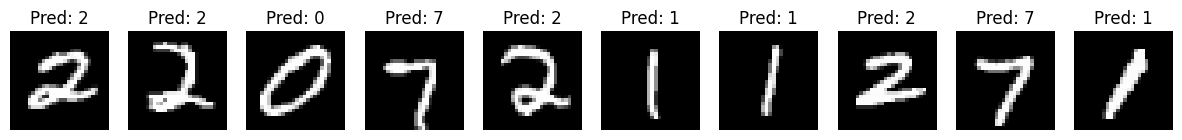

In [34]:
#visualizing prediction
samples,labels=next(iter(test_loader))
samples,labels=samples.to(device),labels.to(device)
predictions=[predict_image(img) for img in samples[:10]]

fig,axes=plt.subplots(1,10,figsize=(15,4))
for i,ax in enumerate(axes):
    ax.imshow(samples[i].cpu().squeeze(),cmap='gray')
    ax.set_title(f'Pred: {predictions[i]}')
    ax.axis('off')
plt.show()